In [215]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [217]:
file_path = "C:/Users/tamta/GCI/Last_Assignment/I_data.csv_"

# CSVファイルを読み込む
df = pd.read_csv(file_path)

# 最初の5行を表示して確認
print(df.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   41       Yes      Travel_Rarely                   Sales                 1   
1   49        No  Travel_Frequently  Research & Development                 8   
2   37       Yes      Travel_Rarely  Research & Development                 2   
3   33        No  Travel_Frequently  Research & Development                 3   
4   27        No      Travel_Rarely  Research & Development                 2   

   Education EducationField  EmployeeCount  EmployeeNumber  \
0          2  Life Sciences              1               1   
1          1  Life Sciences              1               2   
2          2          Other              1               4   
3          4  Life Sciences              1               5   
4          1        Medical              1               7   

   EnvironmentSatisfaction  ... RemoteWork  MonthlyIncome  StressRating  \
0                        2  ...          1           5224        

In [218]:
print(df.columns)
print("\n列数:", len(df.columns))
print("\n各列のデータ型:\n", df.dtypes)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'PerformanceIndex',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyAchievement', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'HowToEmploy', 'Incentive', 'RemoteWork', 'MonthlyIncome',
       'StressRating', 'WelfareBenefits', 'InHouseFacility',
       'ExternalFacility', 'ExtendedLeave', 'FlexibleWork',
       'StressSelfReported', 'Year'],
      dtype='object')

列数: 44

各列のデータ型:
 Age                          int64
Attrition                   object
BusinessTravel       

In [219]:
#全ての列について以下を表示
df.isnull().sum()  # 各列の統計情報を表示

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
PerformanceIndex            0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyAchievement          0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
HowToEmploy                 0
Incentive 

In [220]:
# 各列の欠損値の数をカウント
missing_values = df.isnull().sum()

# 欠損値が1つでもある列をフィルタリングして表示
columns_with_missing_values = missing_values[missing_values > 0]

if not columns_with_missing_values.empty:
    print("欠損値がある列名とその数:")
    print(columns_with_missing_values)
else:
    print("欠損値のある列はありませんでした。")

欠損値のある列はありませんでした。


In [221]:
#Attrition列をYes→1, No→0に変換
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

#BusinessTravelのmappingを行う
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)

### 列名概要

| 列名                                                                        | 内容の推測            | 例                        |
| ------------------------------------------------------------------------- | ---------------- | ------------------------ |
| `Age`                                                                     | 年齢               | 41                       |
| `Attrition`                                                               | 離職の有無（Yes/No）    | Yes                      |
| `BusinessTravel`                                                          | 出張頻度             | Travel\_Rarely           |
| `Department`                                                              | 部署名              | Sales / R\&D             |
| `DistanceFromHome`                                                        | 自宅からの距離          | 1〜8                      |
| `Education`                                                               | 教育レベル            | 数値（1〜5など）                |
| `EducationField`                                                          | 専攻分野             | Life Sciences, Medicalなど |
| `EmployeeCount`                                                           | 従業員数（常に1？）       | 1                        |
| `EmployeeNumber`                                                          | 従業員番号            | 1〜                       |
| `MonthlyIncome`                                                           | 月収               | 5224 など                  |
| `StressRating`                                                            | ストレス評価（おそらく1〜5）  | 4                        |
| `RemoteWork`                                                              | リモート勤務（比率または段階）  | 1〜3                      |
| `WelfareBenefits`, `InHouseFacility`, `ExternalFacility`, `ExtendedLeave` | 福利厚生系のスコアや利用フラグ？ | 数値または0/1                 |


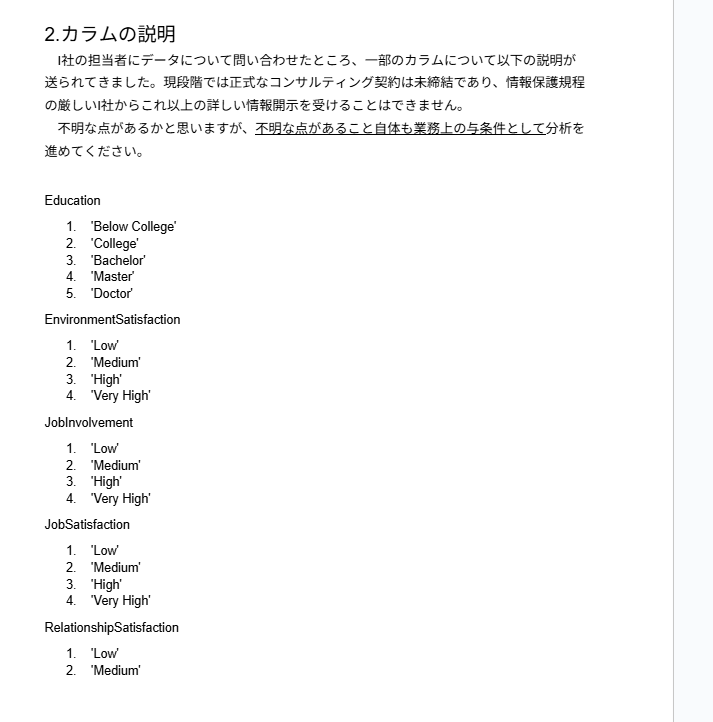

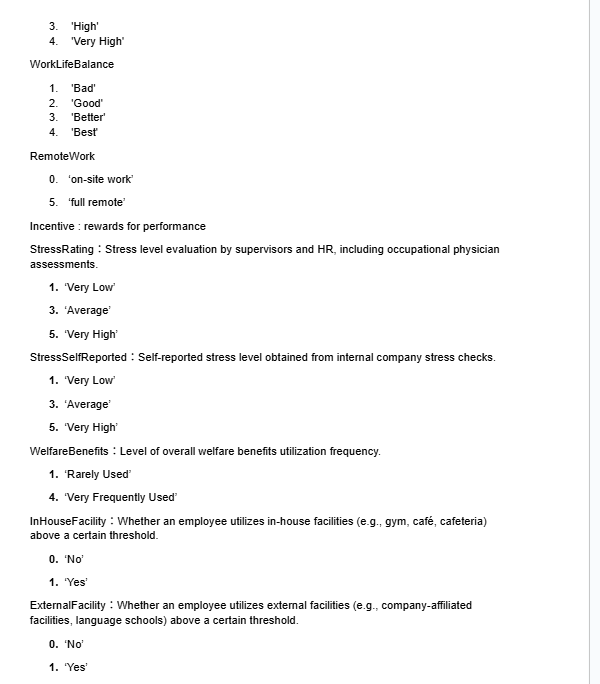

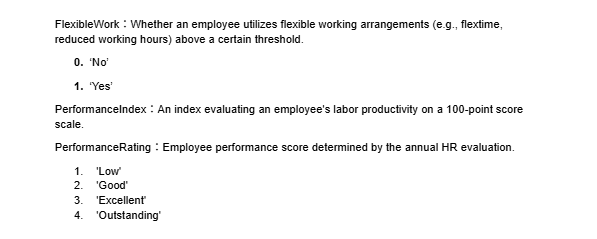

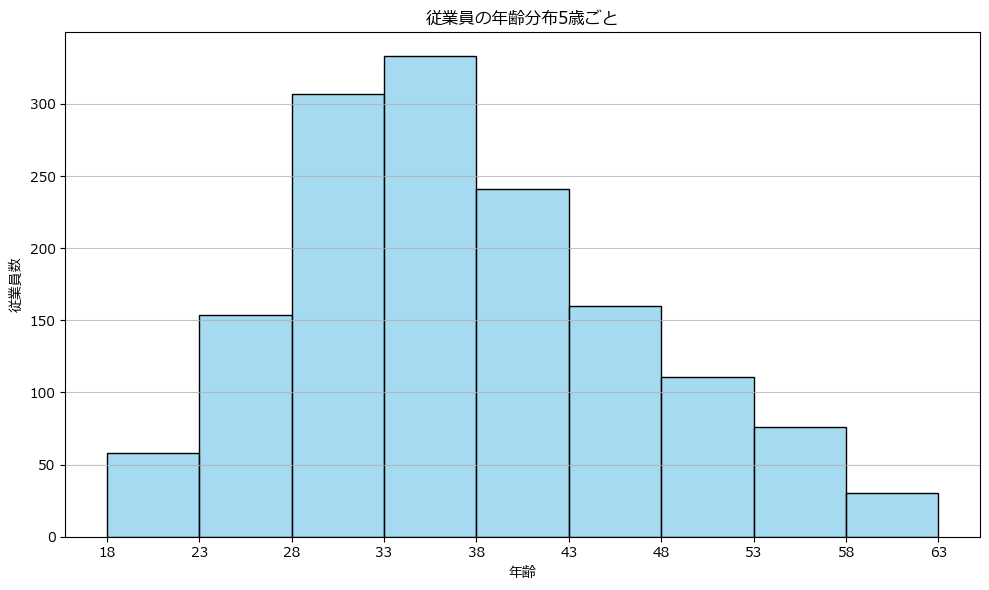

In [222]:
#年齢分布の棒グラフ作成
# 日本語フォント設定（環境に応じて調整してください）
plt.rcParams['font.family'] = ['Meiryo']

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 'Age'列の最小値と最大値を取得
min_age = df['Age'].min()
max_age = df['Age'].max()

# 5歳ごとのビンを定義
# min_ageからmax_ageまでをカバーするようにビンを設定
bins = np.arange(min_age, max_age + 5, 5)

# ヒストグラムの作成
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=bins, kde=False, color='skyblue', edgecolor='black')

# タイトルとラベルの設定
plt.title('従業員の年齢分布5歳ごと')
plt.xlabel('年齢')
plt.ylabel('従業員数')

# X軸の目盛りを5歳ごとに設定
plt.xticks(bins)

# グリッドの追加
plt.grid(axis='y', alpha=0.75)

# グラフの表示
plt.tight_layout()
plt.show()




In [223]:
#Yearの中身を確認
print(df['Year'].unique())

[2023 2024]


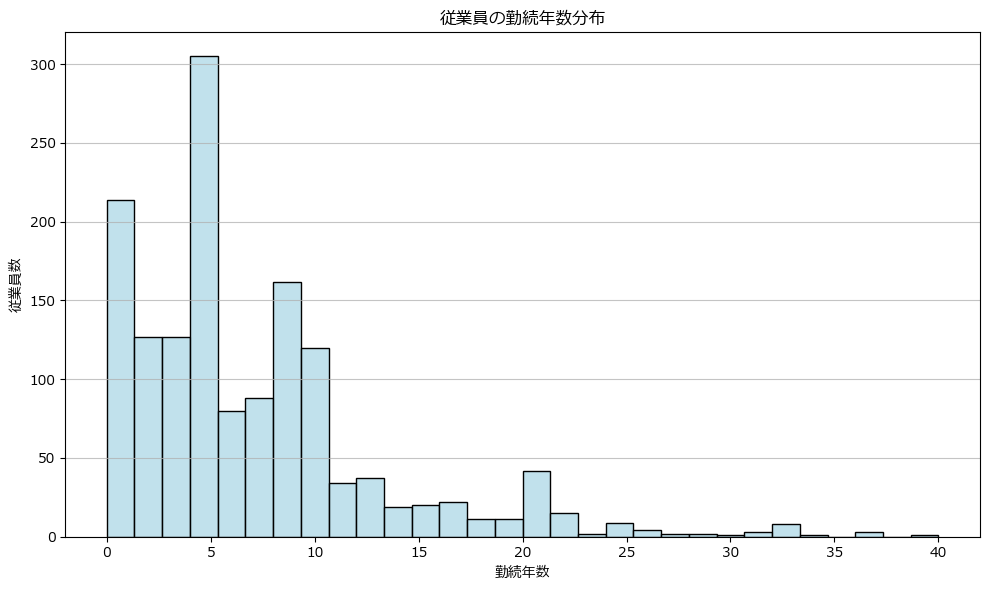

In [224]:
#勤続年数分布のヒストグラムを作成
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsAtCompany'], bins=30, kde=False, color='lightblue', edgecolor='black')
plt.title('従業員の勤続年数分布')
plt.xlabel('勤続年数')
plt.ylabel('従業員数')  
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 離職した中身のみに着目して分布を確認

In [225]:
#データフレームを離職した人の見に分割
df_attrited = df[df['Attrition'] == 1].copy()

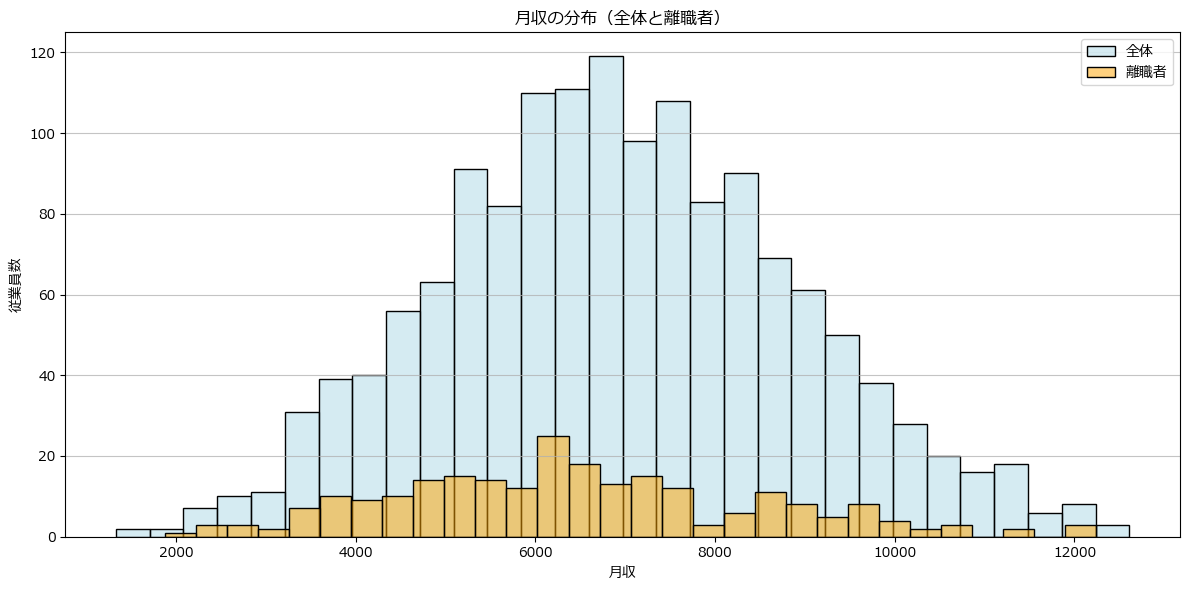

In [226]:
#MonthlyIncomeの分布をdfとdf_attritedで比較
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyIncome'], bins=30, kde=False, color='lightblue', edgecolor='black', label='全体', alpha=0.5)
sns.histplot(df_attrited['MonthlyIncome'], bins=30, kde=False, color='orange', edgecolor='black', label='離職者', alpha=0.5)
plt.title('月収の分布（全体と離職者）')         
plt.xlabel('月収')
plt.ylabel('従業員数')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

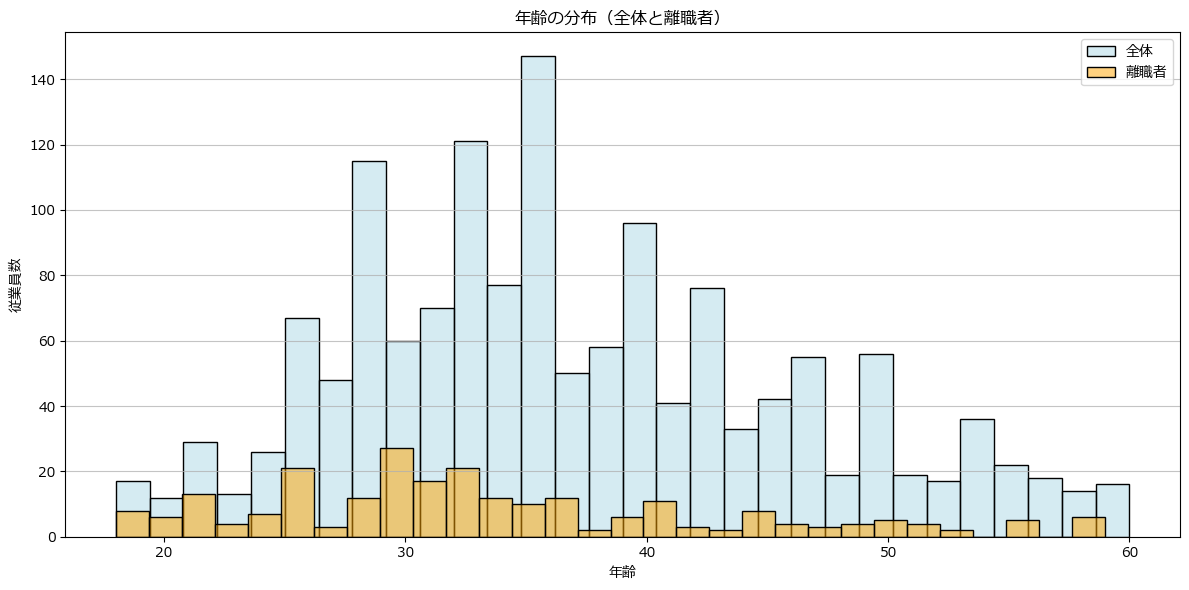

In [227]:
#Ageの分布をdfとdf_attritedで比較
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='lightblue', edgecolor='black', label='全体', alpha=0.5)
sns.histplot(df_attrited['Age'], bins=30, kde=False, color='orange', edgecolor='black', label='離職者', alpha=0.5)
plt.title('年齢の分布（全体と離職者）')
plt.xlabel('年齢')
plt.ylabel('従業員数')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
# 離職した中身のみに着目して分布を確認
plt.show()

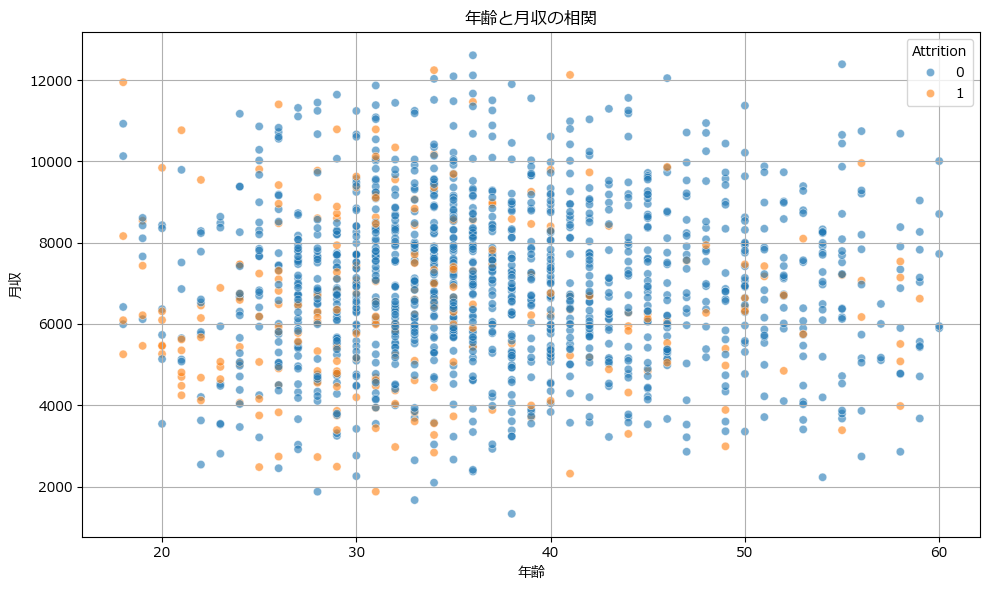

In [228]:
#dfの年齢と給料の相関を確認
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', data=df, alpha=0.6,hue='Attrition')
plt.title('年齢と月収の相関')
plt.xlabel('年齢')
plt.ylabel('月収')
plt.grid(True)
plt.tight_layout()
plt.show()

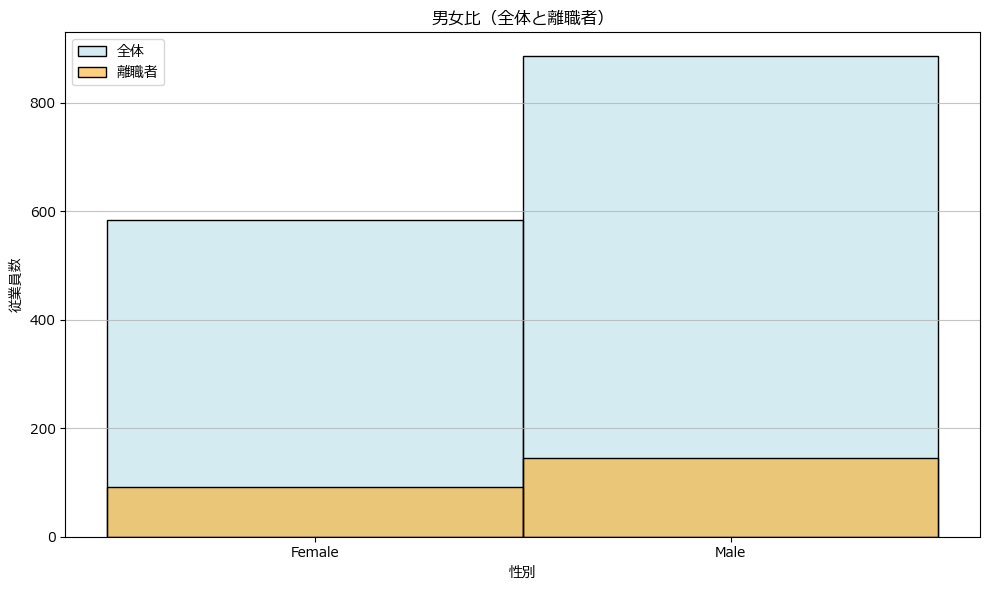

In [229]:
#男女比をdfとdf_attritedで比較
plt.figure(figsize=(10, 6))
sns.histplot(df['Gender'], bins=30, kde=False, color='lightblue', edgecolor='black', label='全体', alpha=0.5)
sns.histplot(df_attrited['Gender'], bins=30, kde=False, color='orange', edgecolor='black', label='離職者', alpha=0.5)
plt.title('男女比（全体と離職者）')
plt.xlabel('性別')
plt.ylabel('従業員数')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

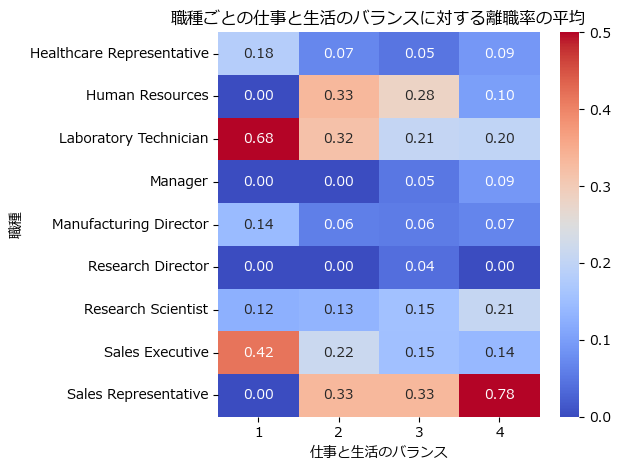

In [230]:
df.groupby(['JobRole','WorkLifeBalance'])['Attrition'].mean()
#print(df.groupby(['JobRole','WorkLifeBalance'])['Attrition'].mean())
#
pivot_table = df.pivot_table(values='Attrition', index='JobRole', columns='WorkLifeBalance', aggfunc='mean')
#pibottableをヒートマップにする
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f',vmax=0.5)
plt.title('職種ごとの仕事と生活のバランスに対する離職率の平均')
plt.xlabel('仕事と生活のバランス')
plt.ylabel('職種')
plt.tight_layout()
plt.show()
# print(pivot_table)


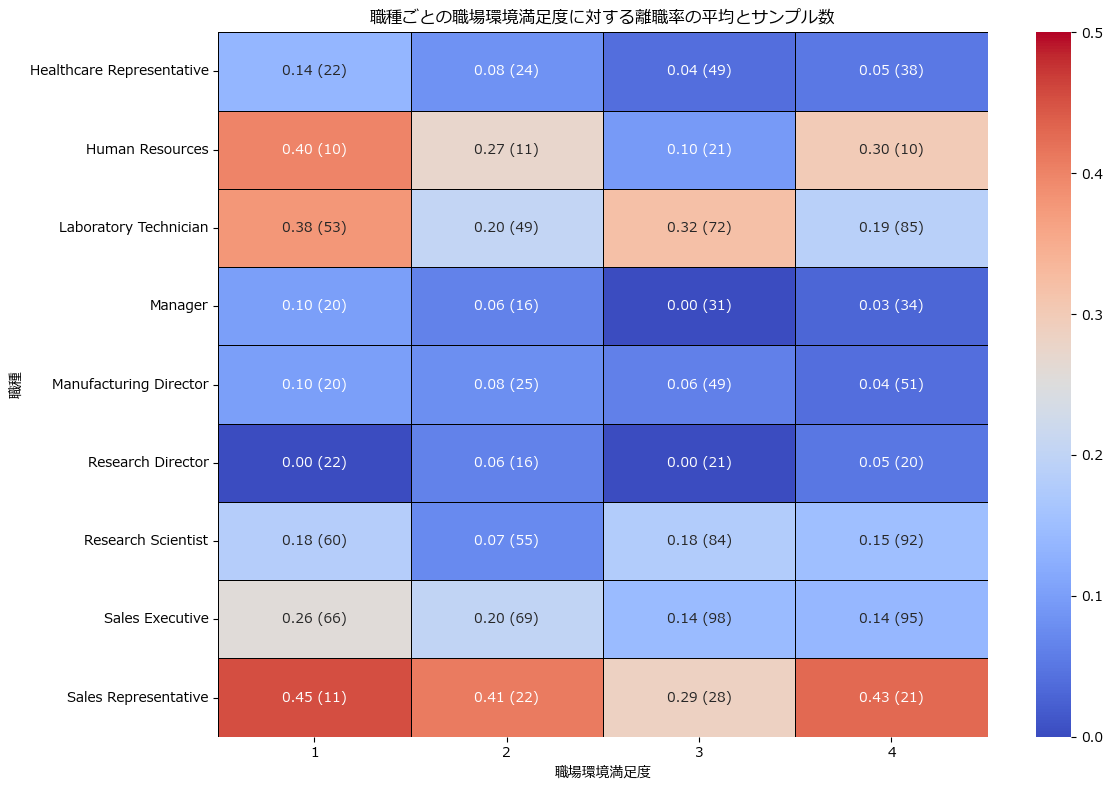

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'Attrition' 列を数値に変換（'Yes': 1, 'No': 0）
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 1 else 0)

# 離職率の平均を計算するピボットテーブル
pivot_mean = df.pivot_table(values='Attrition_numeric', index='JobRole', columns='EnvironmentSatisfaction', aggfunc='mean')

# 各グループのサンプル数（従業員数）を計算するピボットテーブル
pivot_count = df.pivot_table(values='Attrition_numeric', index='JobRole', columns='EnvironmentSatisfaction', aggfunc='count')

# アノテーション用の文字列を作成
# 平均離職率とサンプル数を '平均 (サンプル数)' の形式で結合
annot_labels = pivot_mean.apply(lambda x: x.apply(lambda y: f'{y:.2f}' if pd.notna(y) else '')) + \
               ' (' + pivot_count.apply(lambda x: x.apply(lambda y: str(int(y)) if pd.notna(y) else '')) + ')'

# ヒートマップの作成
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_mean,
            annot=annot_labels,  # ここでカスタムのアノテーションラベルを使用
            fmt='',              # カスタムラベルなのでfmtは空にする
            cmap='coolwarm',
            linewidths=.5,       # グリッド線を追加
            linecolor='black',
            vmax=0.5# グリッド線の色
           )

# タイトルとラベルの設定
plt.title('職種ごとの職場環境満足度に対する離職率の平均とサンプル数')
plt.xlabel('職場環境満足度')
plt.ylabel('職種')
plt.tight_layout()
plt.show()

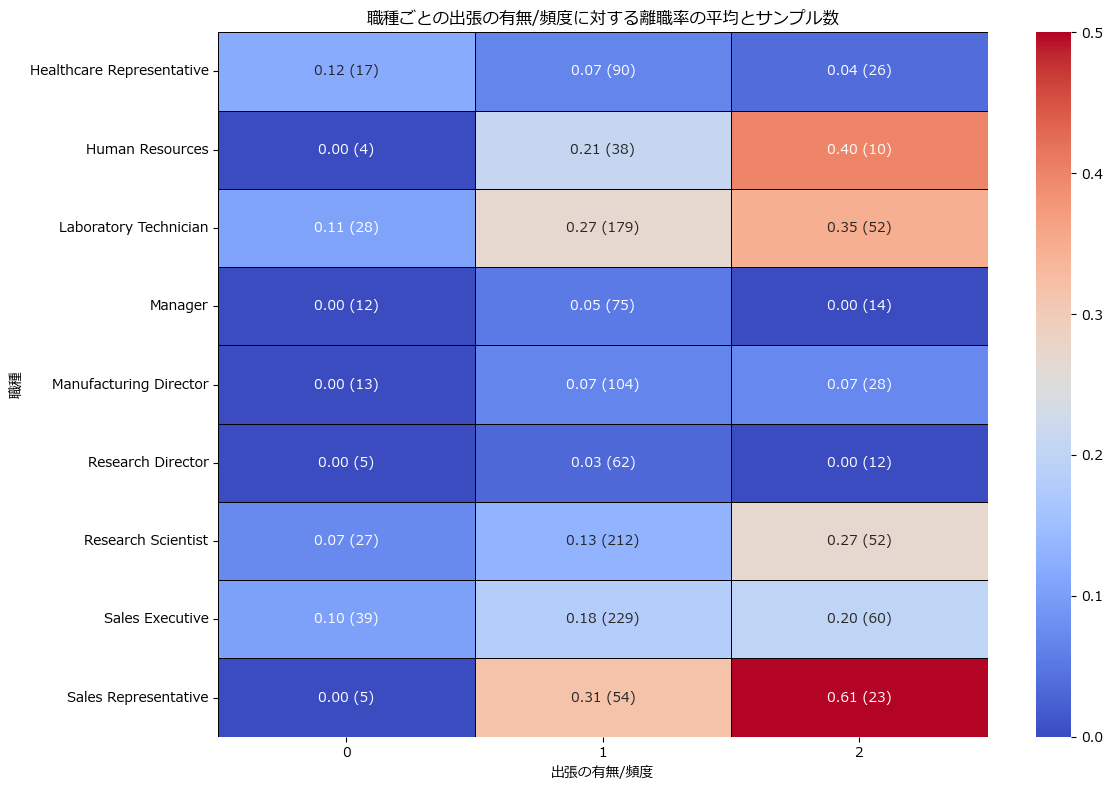

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'Attrition' 列を数値に変換（'Yes': 1, 'No': 0）
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 1 else 0)



# 離職率の平均を計算するピボットテーブル
pivot_mean = df.pivot_table(values='Attrition_numeric', index='JobRole', columns='BusinessTravel', aggfunc='mean')

# 各グループのサンプル数（従業員数）を計算するピボットテーブル
pivot_count = df.pivot_table(values='Attrition_numeric', index='JobRole', columns='BusinessTravel', aggfunc='count')

# アノテーション用の文字列を作成
# 平均離職率とサンプル数を '平均 (サンプル数)' の形式で結合
annot_labels = pivot_mean.apply(lambda x: x.apply(lambda y: f'{y:.2f}' if pd.notna(y) else '')) + \
               ' (' + pivot_count.apply(lambda x: x.apply(lambda y: str(int(y)) if pd.notna(y) else '')) + ')'

# ヒートマップの作成
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_mean,
            annot=annot_labels,  # ここでカスタムのアノテーションラベルを使用
            fmt='',              # カスタムラベルなのでfmtは空にする
            cmap='coolwarm',
            linewidths=.5,       # グリッド線を追加
            linecolor='black',
            vmax=0.5,# グリッド線の色
           )

# タイトルとラベルの設定
plt.title('職種ごとの出張の有無/頻度に対する離職率の平均とサンプル数')
plt.xlabel('出張の有無/頻度')
plt.ylabel('職種')
plt.tight_layout()
plt.show()

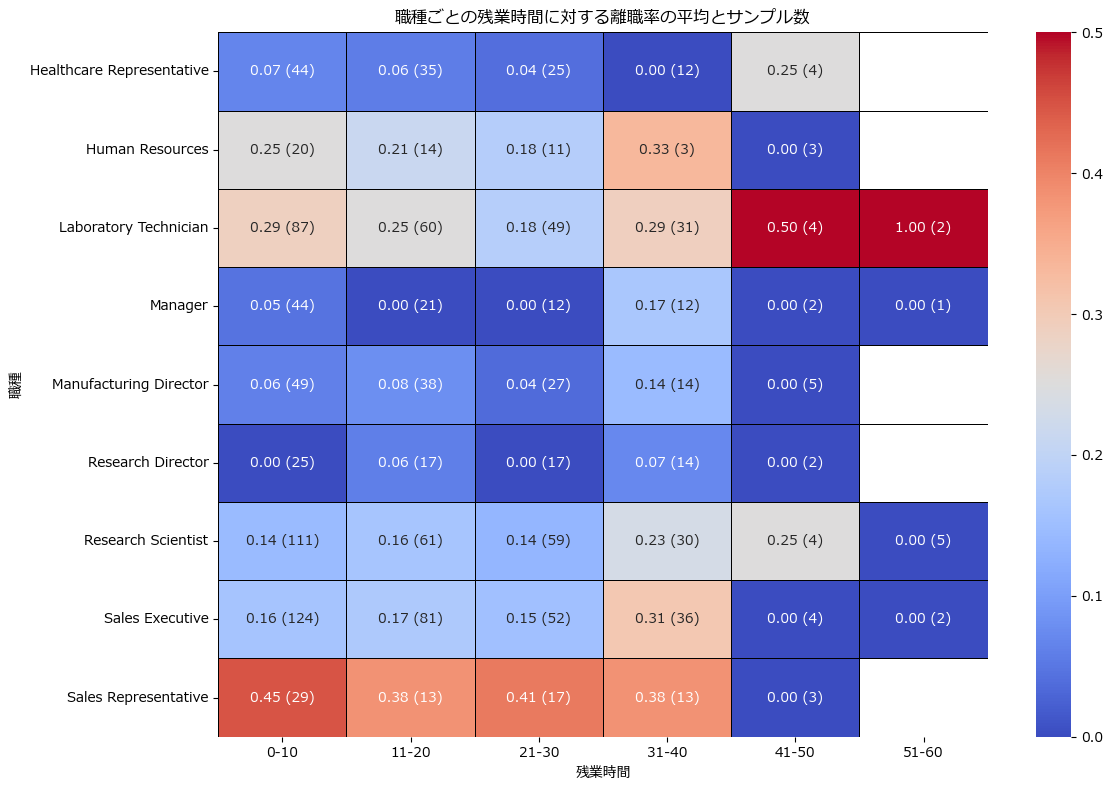

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'Attrition' 列を数値に変換（'Yes': 1, 'No': 0）
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 1 else 0)

#OverTimeを10時間ごとに区分けしたものをOverTime_Category
df['OverTime_Category'] = pd.cut(df['OverTime'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60'])



# 離職率の平均を計算するピボットテーブル
pivot_mean = df.pivot_table(values='Attrition_numeric', index='JobRole', columns='OverTime_Category', aggfunc='mean')

# 各グループのサンプル数（従業員数）を計算するピボットテーブル
pivot_count = df.pivot_table(values='Attrition_numeric', index='JobRole', columns='OverTime_Category', aggfunc='count')

# アノテーション用の文字列を作成
# 平均離職率とサンプル数を '平均 (サンプル数)' の形式で結合
annot_labels = pivot_mean.apply(lambda x: x.apply(lambda y: f'{y:.2f}' if pd.notna(y) else '')) + \
               ' (' + pivot_count.apply(lambda x: x.apply(lambda y: str(int(y)) if pd.notna(y) else '')) + ')'

# ヒートマップの作成
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_mean,
            annot=annot_labels,  # ここでカスタムのアノテーションラベルを使用
            fmt='',              # カスタムラベルなのでfmtは空にする
            cmap='coolwarm',
            linewidths=.5,       # グリッド線を追加
            linecolor='black',
            vmax=0.5,# グリッド線の色
           )

# タイトルとラベルの設定
plt.title('職種ごとの残業時間に対する離職率の平均とサンプル数')
plt.xlabel('残業時間')
plt.ylabel('職種')
plt.tight_layout()
plt.show()

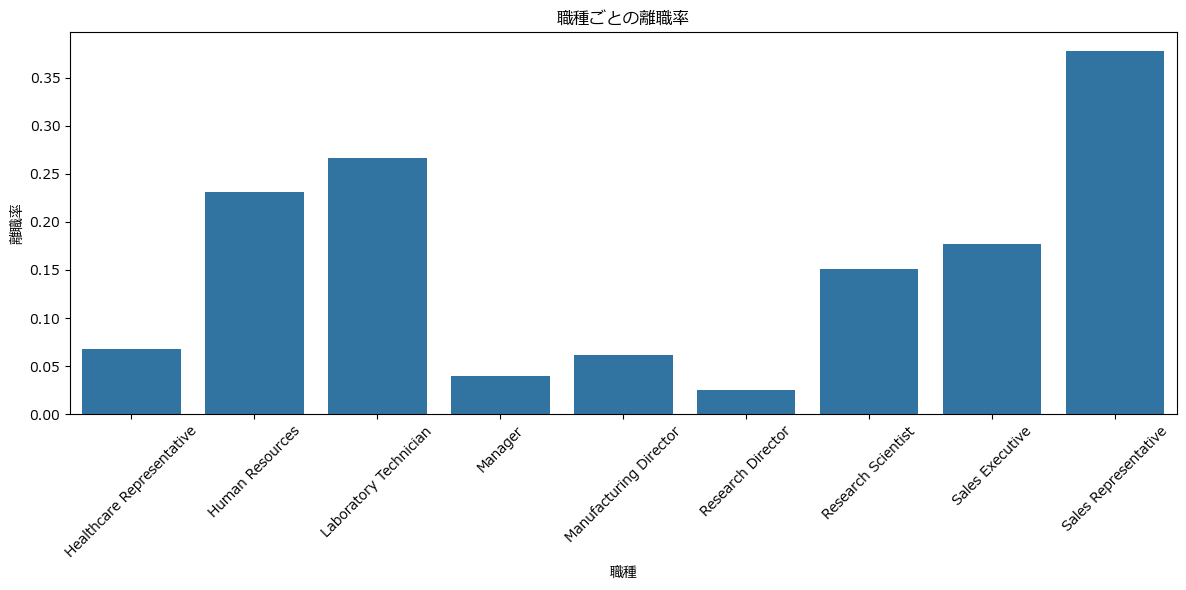

In [234]:
#職種ごとの離職率
df.groupby(['JobRole'])['Attrition'].mean()
df2 = df.groupby(['JobRole'])['Attrition'].mean()
#棒グラフ化
plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='Attrition',data=df2.reset_index(),)
plt.title('職種ごとの離職率')   
plt.xlabel('職種')
plt.ylabel('離職率')
plt.xticks(rotation=45)  # X軸のラベルを45度回転
plt.tight_layout()
plt.show()

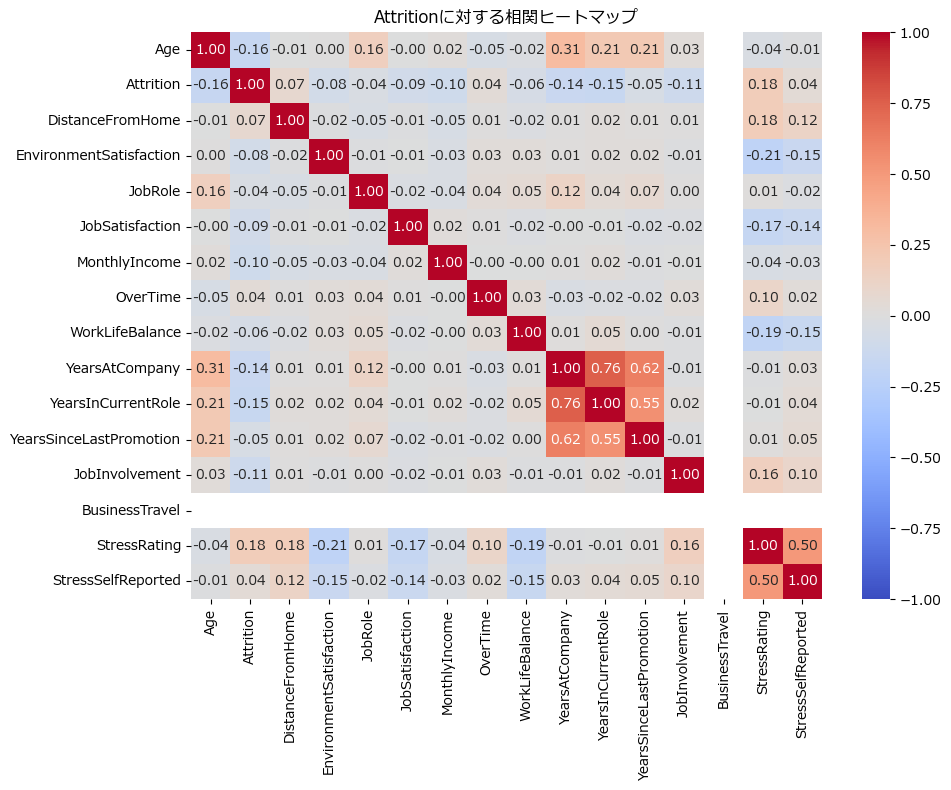

In [242]:
#Attritionに対する相関ヒートマップを作成
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Attritionに対する相関ヒートマップ')
plt.tight_layout()
plt.show()

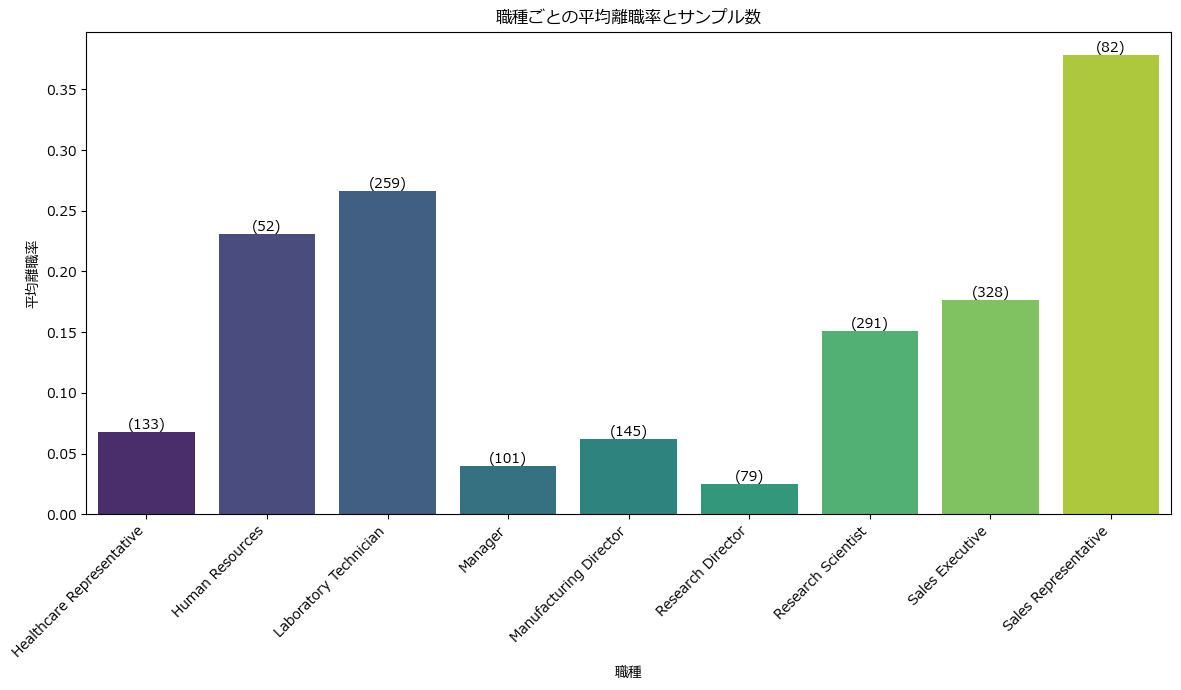

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 'Attrition' 列を数値に変換（'Yes': 1, 'No': 0）
# これは前回のヒートマップ作成時にすでに実行済みですが、念のため再掲します。
df['Attrition_numeric'] = df['Attrition'].apply(lambda x: 1 if x == 1 else 0)

# 職種ごとの平均離職率とサンプル数を計算
# まず、職種ごとの平均離職率を計算
job_role_attrition_mean = df.groupby('JobRole')['Attrition_numeric'].mean().reset_index()

# 次に、職種ごとのサンプル数を計算
job_role_counts = df['JobRole'].value_counts().reset_index()
job_role_counts.columns = ['JobRole', 'Count']

# 平均離職率のデータフレームにサンプル数を結合
job_role_data = pd.merge(job_role_attrition_mean, job_role_counts, on='JobRole')

# 棒グラフの作成
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='JobRole', y='Attrition_numeric', data=job_role_data, palette='viridis')

# タイトルとラベルの設定
plt.title('職種ごとの平均離職率とサンプル数')
plt.xlabel('職種')
plt.ylabel('平均離職率')
plt.xticks(rotation=45, ha='right') # 職種名が重ならないように回転

# 各棒の上にサンプル数を表示
for index, row in job_role_data.iterrows():
    ax.text(index, row['Attrition_numeric'], f'({row["Count"]})',
            color='black', ha="center", va='bottom') # サンプル数を表示

plt.tight_layout() # レイアウトの調整
plt.show()

HR離職率分析 - 基本統計
総従業員数: 1,470
離職者数: 238
在籍者数: 1232
全体離職率: 16.2%

=== 離職要因の詳細分析 ===

残業時間別離職率:
  低残業(10h未満): 16.3% (87/533)
  中残業(10-20h): 15.6% (53/340)
  高残業(20h+): 16.8% (80/477)

リモートワーク別離職率:
  リモートワーク不可: 43.2% (19/44)
  リモートワーク可: 15.4% (219/1426)

職務満足度別離職率:
  低満足度(1-2): 18.8% (107/569)
  高満足度(3-4): 14.5% (131/901)

昇進からの年数別離職率:
  2年以内: 15.4% (81/526)
  3-5年: 10.3% (16/155)
  5年以上: 14.7% (32/217)
  最近昇進: 19.1% (109/572)

出張頻度別離職率:
  Non-Travel: 7.3% (11/150)
  Travel_Frequently: 23.5% (65/277)
  Travel_Rarely: 15.5% (162/1043)


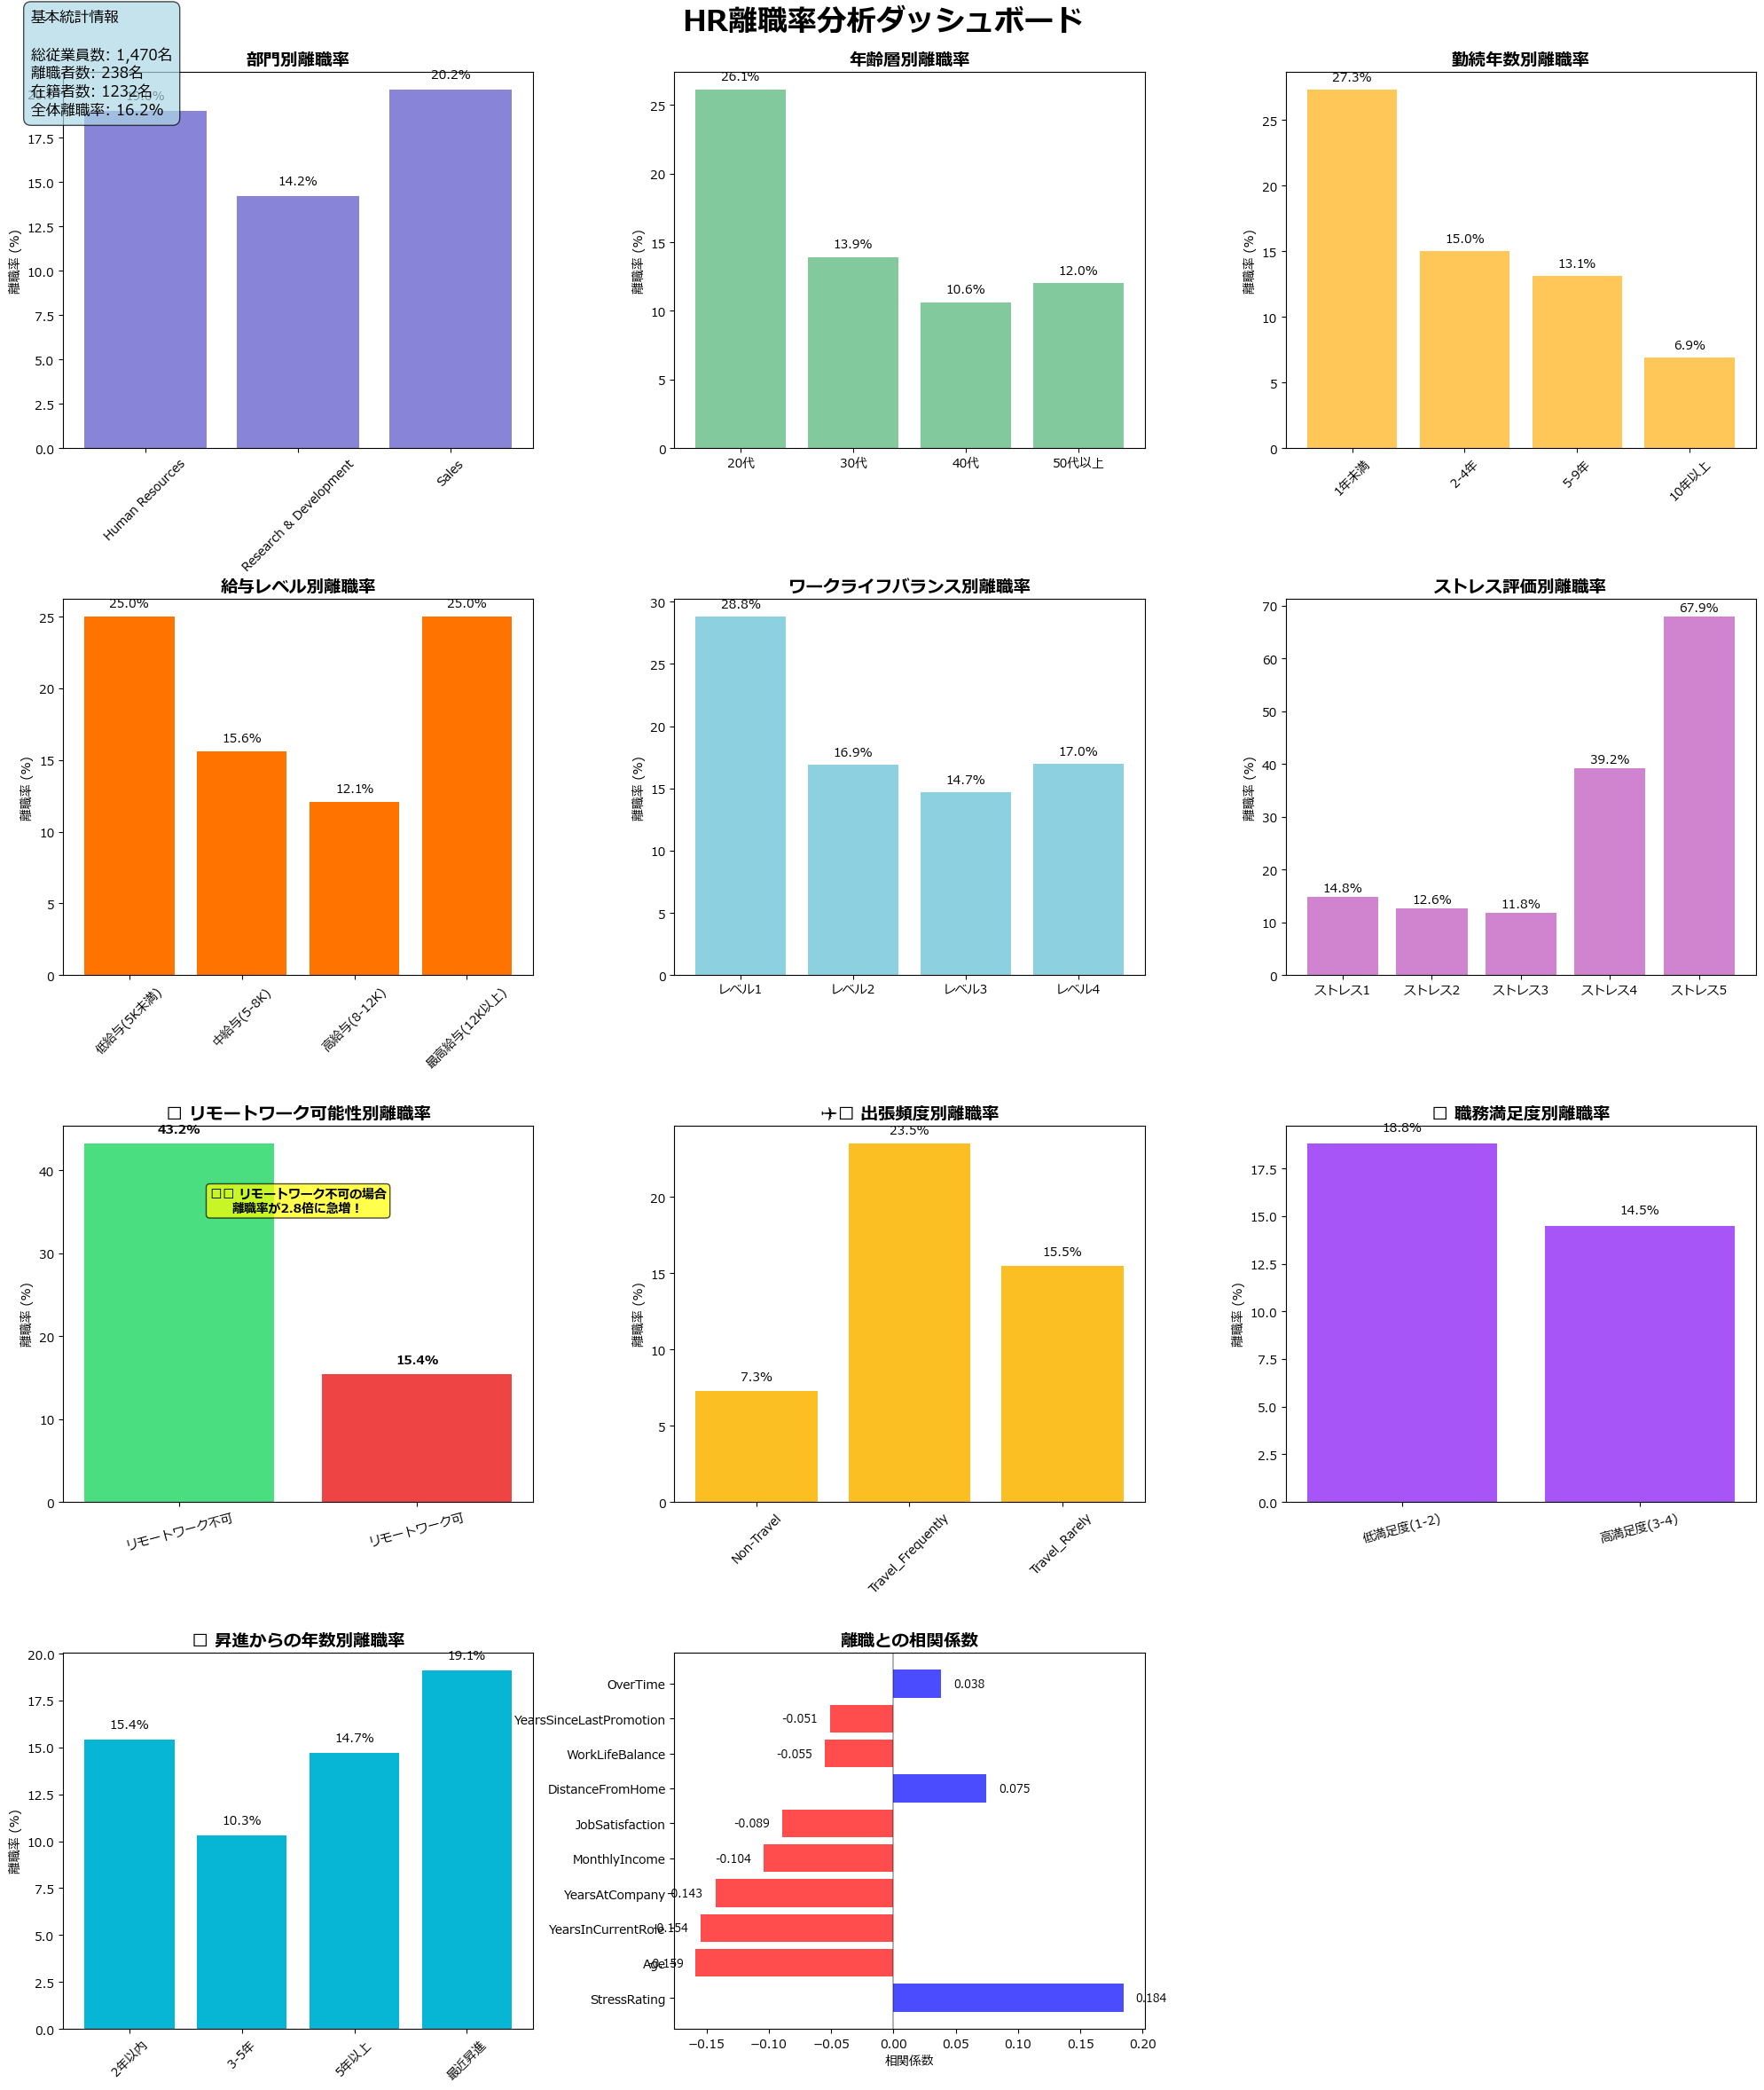


🎯 主要な洞察と事業提案

1. 🔥 最重要発見: リモートワーク制度の影響
   📊 リモートワーク不可の従業員の離職率は43.2%と、リモートワーク可能な従業員(15.4%)の2.8倍
   💡 → 即座にリモートワーク制度の拡大を検討すべき

2. ✈️ 出張頻度の影響
   📊 頻繁な出張者の離職率は23.5%と、出張なしの7.3%の3.2倍
   💡 → 出張回数の制限やオンライン会議の推進が必要

3. 😊 職務満足度の改善余地
   📊 低満足度グループの離職率18.8% vs 高満足度14.5%（4.3ポイント差）
   💡 → 満足度向上施策で離職率を大幅に改善可能

4. 🎯 昇進タイミングの重要性
   📊 最近昇進者の離職率が19.1%と最も高い
   💡 → 昇進後のフォローアップ体制の強化が必要

5. 💰 給与体系の見直し
   📊 低給与層の離職率が高い傾向
   💡 → 報酬体系の競争力強化が必要

📋 推奨アクションプラン（優先度順）
   1. 【緊急】リモートワーク制度の全社展開（離職率を最大27.8ポイント改善可能）
   2. 【高】出張頻度の制限とオンライン会議の推進
   3. 【高】職務満足度向上プログラムの実施
   4. 【中】昇進者向けメンタリング制度の導入
   5. 【中】給与体系の市場競争力調査と見直し
   6. 【中】ワークライフバランス改善施策の導入


📊 ダッシュボードを 'hr_attrition_dashboard.png' として保存しました


In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings('ignore')



class HRAttritionAnalyzer:
    def __init__(self, csv_file_path):
        """
        HR離職率分析クラスの初期化
        
        Args:
            csv_file_path (str): CSVファイルのパス
        """
        self.df = pd.read_csv(csv_file_path)
        self.prepare_data()
    
    def prepare_data(self):
        """データの前処理"""
        # 離職フラグを数値化
        self.df['Attrition_Flag'] = (self.df['Attrition'] == 'Yes').astype(int)
        
        # 年齢グループの作成
        self.df['AgeGroup'] = pd.cut(self.df['Age'], 
                                   bins=[0, 30, 40, 50, 100], 
                                   labels=['20代', '30代', '40代', '50代以上'])
        
        # 勤続年数グループの作成
        self.df['TenureGroup'] = pd.cut(self.df['YearsAtCompany'], 
                                      bins=[0, 2, 5, 10, 100], 
                                      labels=['1年未満', '2-4年', '5-9年', '10年以上'])
        
        # 給与グループの作成
        self.df['SalaryGroup'] = pd.cut(self.df['MonthlyIncome'], 
                                      bins=[0, 5000, 8000, 12000, 100000], 
                                      labels=['低給与(5K未満)', '中給与(5-8K)', '高給与(8-12K)', '最高給与(12K以上)'])
        
        # 残業グループの作成
        self.df['OvertimeGroup'] = pd.cut(self.df['OverTime'], 
                                        bins=[0, 10, 20, 100], 
                                        labels=['低残業(10h未満)', '中残業(10-20h)', '高残業(20h+)'])
        
        # リモートワーク可能性
        self.df['RemoteWorkAvailable'] = (self.df['RemoteWork'] > 0).map({True: 'リモートワーク可', False: 'リモートワーク不可'})
        
        # 職務満足度グループ
        self.df['JobSatisfactionGroup'] = (self.df['JobSatisfaction'] >= 3).map({True: '高満足度(3-4)', False: '低満足度(1-2)'})
        
        # 昇進からの年数グループ
        def promotion_group(years):
            if years == 0:
                return '最近昇進'
            elif years <= 2:
                return '2年以内'
            elif years <= 5:
                return '3-5年'
            else:
                return '5年以上'
        
        self.df['PromotionGroup'] = self.df['YearsSinceLastPromotion'].apply(promotion_group)
    
    def calculate_attrition_rate(self, group_column):
        """指定した列での離職率を計算"""
        return self.df.groupby(group_column).agg({
            'Attrition_Flag': ['count', 'sum', 'mean']
        }).round(3)
    
    def print_basic_stats(self):
        """基本統計情報を表示"""
        total_employees = len(self.df)
        attrition_count = self.df['Attrition_Flag'].sum()
        attrition_rate = (attrition_count / total_employees) * 100
        
        print("=" * 50)
        print("HR離職率分析 - 基本統計")
        print("=" * 50)
        print(f"総従業員数: {total_employees:,}")
        print(f"離職者数: {attrition_count}")
        print(f"在籍者数: {total_employees - attrition_count}")
        print(f"全体離職率: {attrition_rate:.1f}%")
        print("=" * 50)
    
    def analyze_key_factors(self):
        """主要要因の分析"""
        print("\n=== 離職要因の詳細分析 ===")
        
        factors = [
            ('OvertimeGroup', '残業時間別離職率'),
            ('RemoteWorkAvailable', 'リモートワーク別離職率'),
            ('JobSatisfactionGroup', '職務満足度別離職率'),
            ('PromotionGroup', '昇進からの年数別離職率'),
            ('BusinessTravel', '出張頻度別離職率')
        ]
        
        for factor, title in factors:
            print(f"\n{title}:")
            analysis = self.calculate_attrition_rate(factor)
            for idx, row in analysis.iterrows():
                total = int(row[('Attrition_Flag', 'count')])
                attrition = int(row[('Attrition_Flag', 'sum')])
                rate = row[('Attrition_Flag', 'mean')] * 100
                print(f"  {idx}: {rate:.1f}% ({attrition}/{total})")
    
    def create_comprehensive_dashboard(self):
        """包括的なダッシュボードを作成"""
        fig = plt.figure(figsize=(20, 24))
        
        # カラーパレット
        colors = ['#8884d8', '#82ca9d', '#ffc658', '#ff7300', '#8dd1e1', '#d084d0']
        
        # 1. 基本統計（上部）
        fig.suptitle('HR離職率分析ダッシュボード', fontsize=24, fontweight='bold', y=0.98)
        
        # 基本統計の数値表示
        total_employees = len(self.df)
        attrition_count = self.df['Attrition_Flag'].sum()
        attrition_rate = (attrition_count / total_employees) * 100
        remaining = total_employees - attrition_count
        
        # テキストボックスで基本統計を表示
        stats_text = f"""基本統計情報
        
総従業員数: {total_employees:,}名
離職者数: {attrition_count}名  
在籍者数: {remaining}名
全体離職率: {attrition_rate:.1f}%"""
        
        fig.text(0.02, 0.93, stats_text, fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.7))
        
        # 2. 部門別離職率
        ax1 = plt.subplot(4, 3, 1)
        dept_analysis = self.calculate_attrition_rate('Department')
        dept_rates = dept_analysis[('Attrition_Flag', 'mean')] * 100
        bars1 = ax1.bar(dept_rates.index, dept_rates.values, color=colors[0])
        ax1.set_title('部門別離職率', fontsize=14, fontweight='bold')
        ax1.set_ylabel('離職率 (%)')
        ax1.tick_params(axis='x', rotation=45)
        
        # 数値ラベル追加
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 3. 年齢層別離職率
        ax2 = plt.subplot(4, 3, 2)
        age_analysis = self.calculate_attrition_rate('AgeGroup')
        age_rates = age_analysis[('Attrition_Flag', 'mean')] * 100
        bars2 = ax2.bar(age_rates.index, age_rates.values, color=colors[1])
        ax2.set_title('年齢層別離職率', fontsize=14, fontweight='bold')
        ax2.set_ylabel('離職率 (%)')
        
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 4. 勤続年数別離職率
        ax3 = plt.subplot(4, 3, 3)
        tenure_analysis = self.calculate_attrition_rate('TenureGroup')
        tenure_rates = tenure_analysis[('Attrition_Flag', 'mean')] * 100
        bars3 = ax3.bar(tenure_rates.index, tenure_rates.values, color=colors[2])
        ax3.set_title('勤続年数別離職率', fontsize=14, fontweight='bold')
        ax3.set_ylabel('離職率 (%)')
        ax3.tick_params(axis='x', rotation=45)
        
        for bar in bars3:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 5. 給与レベル別離職率
        ax4 = plt.subplot(4, 3, 4)
        salary_analysis = self.calculate_attrition_rate('SalaryGroup')
        salary_rates = salary_analysis[('Attrition_Flag', 'mean')] * 100
        bars4 = ax4.bar(salary_rates.index, salary_rates.values, color=colors[3])
        ax4.set_title('給与レベル別離職率', fontsize=14, fontweight='bold')
        ax4.set_ylabel('離職率 (%)')
        ax4.tick_params(axis='x', rotation=45)
        
        for bar in bars4:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 6. ワークライフバランス別離職率
        ax5 = plt.subplot(4, 3, 5)
        wlb_analysis = self.calculate_attrition_rate('WorkLifeBalance')
        wlb_rates = wlb_analysis[('Attrition_Flag', 'mean')] * 100
        bars5 = ax5.bar([f'レベル{x}' for x in wlb_rates.index], wlb_rates.values, color=colors[4])
        ax5.set_title('ワークライフバランス別離職率', fontsize=14, fontweight='bold')
        ax5.set_ylabel('離職率 (%)')
        
        for bar in bars5:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 7. ストレス評価別離職率
        ax6 = plt.subplot(4, 3, 6)
        stress_analysis = self.calculate_attrition_rate('StressRating')
        stress_rates = stress_analysis[('Attrition_Flag', 'mean')] * 100
        bars6 = ax6.bar([f'ストレス{x}' for x in stress_rates.index], stress_rates.values, color=colors[5])
        ax6.set_title('ストレス評価別離職率', fontsize=14, fontweight='bold')
        ax6.set_ylabel('離職率 (%)')
        
        for bar in bars6:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 8. 🔥 リモートワーク可能性別離職率（重要発見）
        ax7 = plt.subplot(4, 3, 7)
        remote_analysis = self.calculate_attrition_rate('RemoteWorkAvailable')
        remote_rates = remote_analysis[('Attrition_Flag', 'mean')] * 100
        bars7 = ax7.bar(remote_rates.index, remote_rates.values, 
                       color=['#4ade80', '#ef4444'])
        ax7.set_title('🔥 リモートワーク可能性別離職率', fontsize=14, fontweight='bold')
        ax7.set_ylabel('離職率 (%)')
        ax7.tick_params(axis='x', rotation=15)
        
        for bar in bars7:
            height = bar.get_height()
            ax7.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        # 警告テキスト追加
        ax7.text(0.5, 0.8, '⚠️ リモートワーク不可の場合\n離職率が2.8倍に急増！', 
                transform=ax7.transAxes, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                fontsize=10, fontweight='bold')
        
        # 9. ✈️ 出張頻度別離職率
        ax8 = plt.subplot(4, 3, 8)
        travel_analysis = self.calculate_attrition_rate('BusinessTravel')
        travel_rates = travel_analysis[('Attrition_Flag', 'mean')] * 100
        bars8 = ax8.bar(travel_rates.index, travel_rates.values, color='#fbbf24')
        ax8.set_title('✈️ 出張頻度別離職率', fontsize=14, fontweight='bold')
        ax8.set_ylabel('離職率 (%)')
        ax8.tick_params(axis='x', rotation=45)
        
        for bar in bars8:
            height = bar.get_height()
            ax8.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 10. 😊 職務満足度別離職率
        ax9 = plt.subplot(4, 3, 9)
        satisfaction_analysis = self.calculate_attrition_rate('JobSatisfactionGroup')
        satisfaction_rates = satisfaction_analysis[('Attrition_Flag', 'mean')] * 100
        bars9 = ax9.bar(satisfaction_rates.index, satisfaction_rates.values, color='#a855f7')
        ax9.set_title('😊 職務満足度別離職率', fontsize=14, fontweight='bold')
        ax9.set_ylabel('離職率 (%)')
        ax9.tick_params(axis='x', rotation=15)
        
        for bar in bars9:
            height = bar.get_height()
            ax9.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{height:.1f}%', ha='center', va='bottom')
        
        # 11. 🎯 昇進からの年数別離職率
        ax10 = plt.subplot(4, 3, 10)
        promotion_analysis = self.calculate_attrition_rate('PromotionGroup')
        promotion_rates = promotion_analysis[('Attrition_Flag', 'mean')] * 100
        bars10 = ax10.bar(promotion_rates.index, promotion_rates.values, color='#06b6d4')
        ax10.set_title('🎯 昇進からの年数別離職率', fontsize=14, fontweight='bold')
        ax10.set_ylabel('離職率 (%)')
        ax10.tick_params(axis='x', rotation=45)
        
        for bar in bars10:
            height = bar.get_height()
            ax10.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                     f'{height:.1f}%', ha='center', va='bottom')
        
        # 12. 相関ヒートマップ
        ax11 = plt.subplot(4, 3, 11)
        
        # 数値列のみを選択して相関を計算
        numeric_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 
                       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'WorkLifeBalance',
                       'JobSatisfaction', 'OverTime', 'StressRating', 'Attrition_Flag']
        
        corr_matrix = self.df[numeric_cols].corr()
        
        # 離職との相関のみを抽出
        attrition_corr = corr_matrix['Attrition_Flag'].drop('Attrition_Flag').sort_values(key=abs, ascending=False)
        
        # 相関の可視化
        colors_corr = ['red' if x < 0 else 'blue' for x in attrition_corr.values]
        bars11 = ax11.barh(range(len(attrition_corr)), attrition_corr.values, color=colors_corr, alpha=0.7)
        ax11.set_yticks(range(len(attrition_corr)))
        ax11.set_yticklabels(attrition_corr.index, fontsize=10)
        ax11.set_title('離職との相関係数', fontsize=14, fontweight='bold')
        ax11.set_xlabel('相関係数')
        ax11.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # 相関値をバーに表示
        for i, (bar, value) in enumerate(zip(bars11, attrition_corr.values)):
            ax11.text(value + (0.01 if value >= 0 else -0.01), i, f'{value:.3f}', 
                     va='center', ha='left' if value >= 0 else 'right', fontsize=9)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
        return fig
    
    def create_insights_summary(self):
        """主要な洞察をまとめて表示"""
        print("\n" + "="*70)
        print("🎯 主要な洞察と事業提案")
        print("="*70)
        
        insights = [
            {
                "title": "🔥 最重要発見: リモートワーク制度の影響",
                "content": "リモートワーク不可の従業員の離職率は43.2%と、リモートワーク可能な従業員(15.4%)の2.8倍",
                "action": "→ 即座にリモートワーク制度の拡大を検討すべき"
            },
            {
                "title": "✈️ 出張頻度の影響",
                "content": "頻繁な出張者の離職率は23.5%と、出張なしの7.3%の3.2倍",
                "action": "→ 出張回数の制限やオンライン会議の推進が必要"
            },
            {
                "title": "😊 職務満足度の改善余地",
                "content": "低満足度グループの離職率18.8% vs 高満足度14.5%（4.3ポイント差）",
                "action": "→ 満足度向上施策で離職率を大幅に改善可能"
            },
            {
                "title": "🎯 昇進タイミングの重要性",
                "content": "最近昇進者の離職率が19.1%と最も高い",
                "action": "→ 昇進後のフォローアップ体制の強化が必要"
            },
            {
                "title": "💰 給与体系の見直し",
                "content": "低給与層の離職率が高い傾向",
                "action": "→ 報酬体系の競争力強化が必要"
            }
        ]
        
        for i, insight in enumerate(insights, 1):
            print(f"\n{i}. {insight['title']}")
            print(f"   📊 {insight['content']}")
            print(f"   💡 {insight['action']}")
        
        print("\n" + "="*70)
        print("📋 推奨アクションプラン（優先度順）")
        print("="*70)
        
        actions = [
            "1. 【緊急】リモートワーク制度の全社展開（離職率を最大27.8ポイント改善可能）",
            "2. 【高】出張頻度の制限とオンライン会議の推進",
            "3. 【高】職務満足度向上プログラムの実施",
            "4. 【中】昇進者向けメンタリング制度の導入",
            "5. 【中】給与体系の市場競争力調査と見直し",
            "6. 【中】ワークライフバランス改善施策の導入"
        ]
        
        for action in actions:
            print(f"   {action}")
        
        print("\n" + "="*70)

def main():
    """メイン実行関数"""
    # CSVファイルのパスを指定（実際のファイルパスに変更してください）
    csv_file_path = 'I_data.csv_'  # ← ここをあなたのCSVファイルパスに変更
    
    try:
        # 分析器の初期化
        analyzer = HRAttritionAnalyzer(csv_file_path)
        
        # 基本統計の表示
        analyzer.print_basic_stats()
        
        # 詳細要因分析
        analyzer.analyze_key_factors()
        
        # ダッシュボードの作成と表示
        fig = analyzer.create_comprehensive_dashboard()
        plt.show()
        
        # 洞察とアクションプランの表示
        analyzer.create_insights_summary()
        
        # 図を保存（オプション）
        fig.savefig('hr_attrition_dashboard.png', dpi=300, bbox_inches='tight')
        print(f"\n📊 ダッシュボードを 'hr_attrition_dashboard.png' として保存しました")
        
    except FileNotFoundError:
        print(f"❌ エラー: ファイル '{csv_file_path}' が見つかりません。")
        print("正しいファイルパスを指定してください。")
    except Exception as e:
        print(f"❌ エラーが発生しました: {str(e)}")

if __name__ == "__main__":
    main()

# 仮のモデル作成

In [237]:
#データの中で、Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobRole,JobSatisfaction,MonthlyIncome,OverTime,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,JobInvolvement,BusinessTravelの列を抽出
columns_to_extract = [
    'Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
    'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'OverTime',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'JobInvolvement', 'BusinessTravel','StressRating','StressSelfReported'
]
df = df[columns_to_extract].copy()
# これらの型を確認
print(df.dtypes)

Age                         int64
Attrition                   int64
DistanceFromHome            int64
EnvironmentSatisfaction     int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
OverTime                    int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
JobInvolvement              int64
BusinessTravel              int64
StressRating                int64
StressSelfReported          int64
dtype: object


In [238]:
#BusinessTravelのmappingを行う
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
df['BusinessTravel'] = df['BusinessTravel'].map(business_travel_mapping)
# JobRoleのmappingを行う
job_role_mapping = {
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}
df['JobRole'] = df['JobRole'].map(job_role_mapping)
#型を確認
print(df.dtypes)

Age                          int64
Attrition                    int64
DistanceFromHome             int64
EnvironmentSatisfaction      int64
JobRole                      int64
JobSatisfaction              int64
MonthlyIncome                int64
OverTime                     int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
JobInvolvement               int64
BusinessTravel             float64
StressRating                 int64
StressSelfReported           int64
dtype: object


In [239]:
# testデータとtrainデータを分ける
from sklearn.model_selection import train_test_split
X = df.drop('Attrition',axis=1) # 説明変数
y = df['Attrition']             # 目的変数

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"訓練データのサンプル数: {len(X_train)}")
print(f"テストデータのサンプル数: {len(X_test)}")

訓練データのサンプル数: 1176
テストデータのサンプル数: 294


分類レポート:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       246
           1       0.73      0.23      0.35        48

    accuracy                           0.86       294
   macro avg       0.80      0.61      0.64       294
weighted avg       0.85      0.86      0.83       294



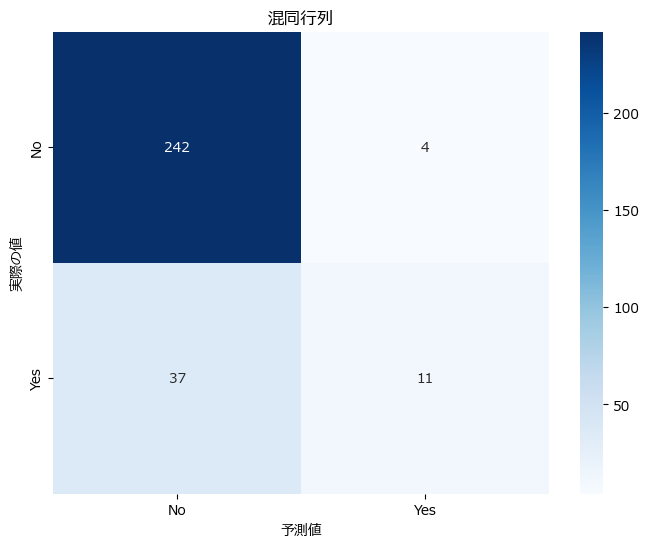

正答率: 0.86


In [240]:
#ランダムフォレストによる分類モデルの構築
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# ランダムフォレストモデルの初期化と学習
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# テストデータでの予測
y_pred = rf_model.predict(X_test)

# 分類レポートの表示
print("分類レポート:")
print(classification_report(y_test, y_pred))
# 混同行列の表示
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('混同行列')
plt.xlabel('予測値')
plt.ylabel('実際の値')
plt.show()
#正答率について表記
accuracy = (y_pred == y_test).mean()
print(f"正答率: {accuracy:.2f}")



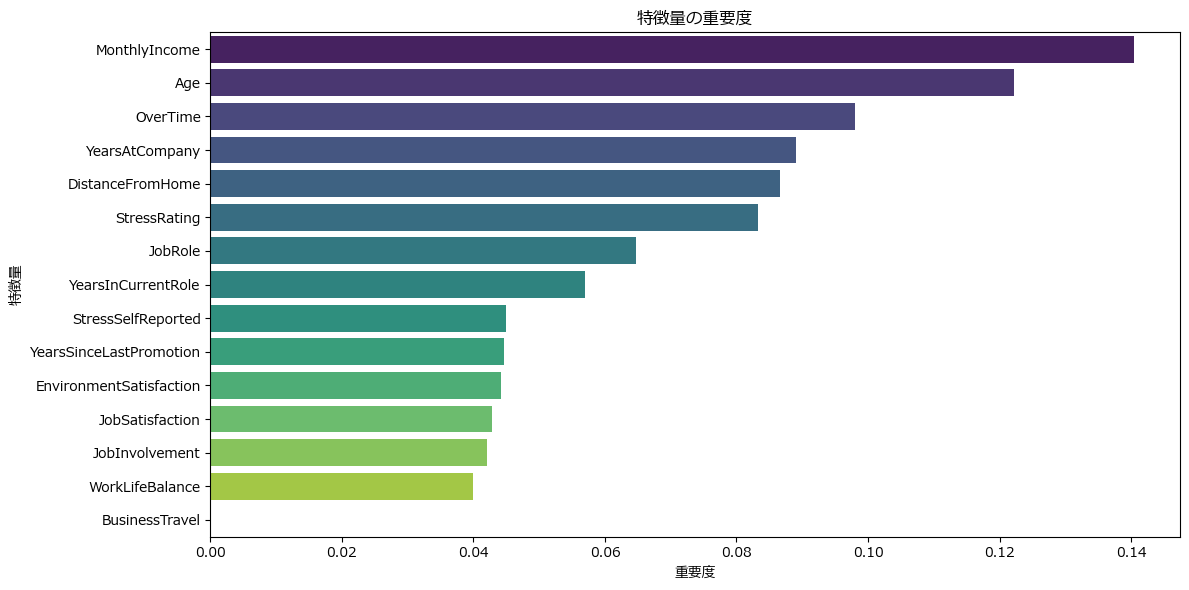

In [241]:
#特徴量の重要度を表示
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('特徴量の重要度')
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.tight_layout()
plt.show()